In [1]:
import matplotlib.pyplot as plt

def plot_series(series):
    epochs = list(range(len(series[0][1])))
    for label, serie in series:
        plt.plot(epochs, serie, label=f"{label}")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

2023-05-08 17:38:19.145400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/francisco/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/francisco/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWa

Epoch 1/20
 1/30 [>.............................] - ETA: 14s - loss: 0.6925 - accuracy: 0.5293

2023-05-08 17:38:24.132071: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


30/30 [==============================] - 1s 28ms/step - loss: 0.5969 - accuracy: 0.6868 - val_loss: 0.3704 - val_accuracy: 0.8750
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3099 - accuracy: 0.9046 - val_loss: 0.2959 - val_accuracy: 0.8904
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2190 - accuracy: 0.9274 - val_loss: 0.2833 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1635 - accuracy: 0.9517 - val_loss: 0.3082 - val_accuracy: 0.8766
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1362 - accuracy: 0.9584 - val_loss: 0.2923 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1060 - accuracy: 0.9694 - val_loss: 0.3032 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0881 - accuracy: 0.9751 - val_loss: 0.3320 - val_accuracy: 0.8820
Epoch 8/20
30/30 [======

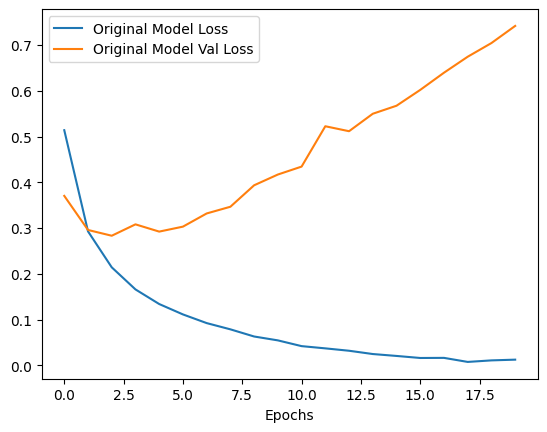

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers

(train_data, train_labels), _ = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
            epochs=20, batch_size=512, validation_split=0.4)
plot_series([("Original Model Loss",history_original.history["loss"]), 
             ("Original Model Val Loss", history_original.history["val_loss"])])

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6339 - accuracy: 0.6944 - val_loss: 0.5066 - val_accuracy: 0.8548
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4637 - accuracy: 0.8759 - val_loss: 0.4159 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3668 - accuracy: 0.9020 - val_loss: 0.3593 - val_accuracy: 0.8784
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3042 - accuracy: 0.9144 - val_loss: 0.3245 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2561 - accuracy: 0.9261 - val_loss: 0.2987 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2170 - accuracy: 0.9379 - val_loss: 0.2835 - val_accuracy: 0.8902
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1921 - accuracy: 0.9458 - val_loss: 0.2780 - val_accuracy: 0.8901
Epoch 8/20
30

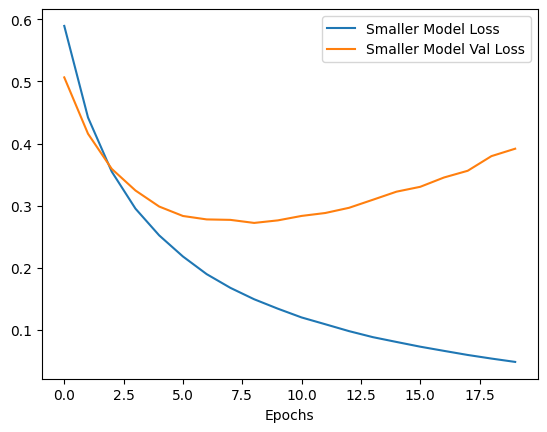

In [3]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])
history_smaller_model = model.fit(
            train_data, train_labels,
            epochs=20, batch_size=512,
            validation_split=0.4)

plot_series([("Smaller Model Loss",history_smaller_model.history["loss"]), 
             ("Smaller Model Val Loss", history_smaller_model.history["val_loss"])])

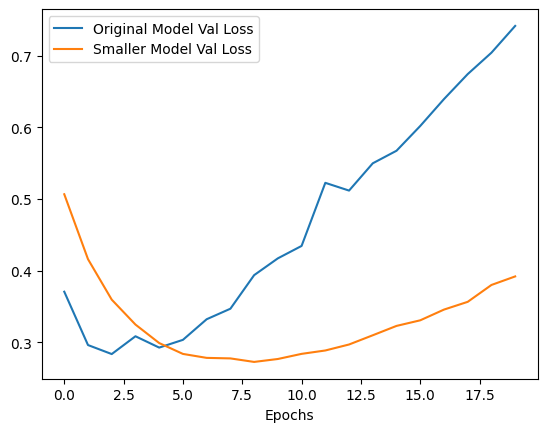

In [4]:
plot_series([("Original Model Val Loss",history_original.history["val_loss"]), 
             ("Smaller Model Val Loss", history_smaller_model.history["val_loss"])])

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6945 - accuracy: 0.6781 - val_loss: 0.4957 - val_accuracy: 0.8703
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4480 - accuracy: 0.8867 - val_loss: 0.4143 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3637 - accuracy: 0.9084 - val_loss: 0.3826 - val_accuracy: 0.8850
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3131 - accuracy: 0.9257 - val_loss: 0.3667 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2871 - accuracy: 0.9359 - val_loss: 0.3727 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2778 - accuracy: 0.9332 - val_loss: 0.4342 - val_accuracy: 0.8569
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2611 - accuracy: 0.9433 - val_loss: 0.3655 - val_accuracy: 0.8841
Epoch 8/20
30

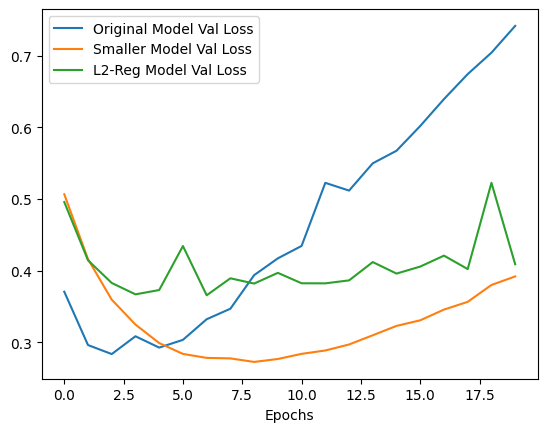

In [5]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
        kernel_regularizer=regularizers.l2(0.002),
        activation="relu"),
    layers.Dense(16,
        kernel_regularizer=regularizers.l2(0.002),
        activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])
history_l2_reg = model.fit(
            train_data, train_labels,
            epochs=20, batch_size=512, validation_split=0.4)
plot_series([("Original Model Val Loss",history_original.history["val_loss"]), 
             ("Smaller Model Val Loss", history_smaller_model.history["val_loss"]),
             ("L2-Reg Model Val Loss", history_l2_reg.history["val_loss"]),
            ])

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6688 - accuracy: 0.5766 - val_loss: 0.5037 - val_accuracy: 0.8472
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5248 - accuracy: 0.7481 - val_loss: 0.3875 - val_accuracy: 0.8706
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4246 - accuracy: 0.8214 - val_loss: 0.3352 - val_accuracy: 0.8759
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3469 - accuracy: 0.8647 - val_loss: 0.2945 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3040 - accuracy: 0.8931 - val_loss: 0.2900 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2707 - accuracy: 0.9056 - val_loss: 0.2787 - val_accuracy: 0.8912
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2300 - accuracy: 0.9244 - val_loss: 0.2827 - val_accuracy: 0.8902
Epoch 8/20
30

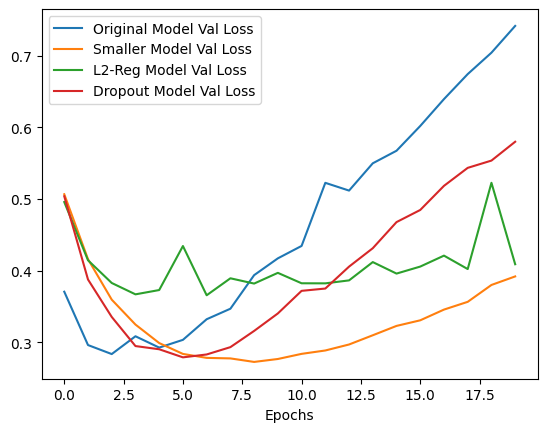

In [6]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])
history_dropout = model.fit(
            train_data, train_labels,
            epochs=20, batch_size=512, validation_split=0.4)
plot_series([("Original Model Val Loss",history_original.history["val_loss"]), 
             ("Smaller Model Val Loss", history_smaller_model.history["val_loss"]),
             ("L2-Reg Model Val Loss", history_l2_reg.history["val_loss"]),
             ("Dropout Model Val Loss", history_dropout.history["val_loss"]),
            ])